# EDA для молекулярных соединений

## 1. Введение

Данный ноутбук представляет собой комплексный исследовательский анализ данных (Exploratory Data Analysis, EDA) для набора данных, включающего молекулярные дескрипторы и соответствующие им показатели биологической активности. Основная задача — глубоко изучить данные, выявить внутренние закономерности, очистить их от аномалий и подготовить для последующего построения моделей машинного обучения.

### Цели анализа:
1.  **Оценка качества данных:** Выявление и обработка пропусков, дубликатов и выбросов.
2.  **Изучение распределений:** Анализ статистических распределений ключевых переменных, в частности целевых показателей: `IC50, mM`, `CC50, mM` и `SI`.
3.  **Корреляционный анализ:** Определение взаимосвязей между признаками для отбора наиболее значимых.
4.  **Подготовка данных:** Нормализация и масштабирование признаков для повышения качества будущих моделей.
5.  **Формулирование гипотез:** На основе анализа предложить гипотезы для дальнейшего моделирования.

## 2. Настройка окружения и импорт библиотек

На этом шаге мы импортируем все необходимые библиотеки для анализа и визуализации данных.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
import os

# Стиль для визуализаций
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Игнорирование предупреждений для чистоты вывода
warnings.filterwarnings('ignore')

# Настройки отображения Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## 3. Загрузка и первичный осмотр данных

Загружаем данные из предоставленного файла и проводим первичный анализ: смотрим на размерность, типы данных и основную информацию.

In [20]:
file_path = 'data.xlsx'
if os.path.exists(file_path):
    df_raw = pd.read_excel(file_path, index_col=0)
    print(f"Данные успешно загружены. Размер: {df_raw.shape[0]} строк, {df_raw.shape[1]} столбцов.")
    # Создаем копию для безопасной работы
    df = df_raw.copy()
else:
    print(f"Ошибка: Файл {file_path} не найден.")
    df = pd.DataFrame() # Создаем пустой DataFrame в случае ошибки

if not df.empty:
    print("\nПервые 5 строк данных:")
    display(df.head())
    
    print("\nОбщая информация о DataFrame:")
    df.info()

Данные успешно загружены. Размер: 1001 строк, 213 столбцов.

Первые 5 строк данных:


,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,0.000000,0.0,0.0,0.0,0.0,0.0,9.984809,0.0,0.0,0.0,54.384066,74.032366,35.342864,0.000000,0.000000,11.423370,0.0,0.000000,43.480583,105.750639,13.089513,0.00000,0,0.0,0.000000,0.000000,0.0,0.0,24.512883,0.000000,33.495774,105.750639,9.984809,0.0,0.0,0,24.72,0.0,0.0,0.0,0.000000,21.659962,24.925325,64.208216,11.42337,0.0,41.542423,9.984809,0.00000,0.0,10.188192,0.000000,4.807589,1.764908,0.000000,13.258223,16.981087,0.000000,0.923077,28,0,2,4,0,4,0,0,0,2,0,2,7,4,0,4,4,7.1212,121.5300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.648545,11.47309


Общая информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


## 4. Очистка данных


### 4.1. Удаление дубликатов

In [21]:
if not df.empty:
    duplicates_count = df.duplicated().sum()
    print(f"Обнаружено {duplicates_count} полностью дублирующихся строк.")
    if duplicates_count > 0:
        df.drop_duplicates(inplace=True)
        print(f"Дубликаты удалены. Новый размер данных: {df.shape[0]} строк.")

Обнаружено 32 полностью дублирующихся строк.
Дубликаты удалены. Новый размер данных: 969 строк.


### 4.2. Обработка пропущенных значений
Проверим, есть ли в данных пропуски. В предоставленном наборе данных пропуски присутствуют в небольшом количестве (менее 1% для каждого столбца). Наилучшей стратегией в данном случае будет **импутация** — замена пропусков на медианное значение по столбцу. Медиана является более робастной метрикой к выбросам по сравнению со средним.

In [22]:
if not df.empty:
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]
    print("Столбцы с пропущенными значениями:")
    print(missing_cols)
    
    if not missing_cols.empty:
        imputer = SimpleImputer(strategy='median')
        df[missing_cols.index] = imputer.fit_transform(df[missing_cols.index])
        print("\nПропущенные значения были заменены медианой.")
        # Проверка
        print(f"Количество пропусков после импутации: {df.isnull().sum().sum()}")

Столбцы с пропущенными значениями:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

Пропущенные значения были заменены медианой.
Количество пропусков после импутации: 0


## 5. Исследовательский анализ данных (EDA)

### 5.1. Описательная статистика
Рассчитаем основные статистические показатели для числовых признаков, чтобы понять их масштабы и распределения.

In [23]:
if not df.empty:
    print("Описательная статистика для целевых переменных:")
    display(df[['IC50, mM', 'CC50, mM', 'SI']].describe())

Описательная статистика для целевых переменных:


,"IC50, mM","CC50, mM",SI
count,969.000000,969.000000,969.000000
mean,220.726223,586.419908,73.967907
std,397.172441,633.624464,695.564665
min,0.003517,0.700808,0.011489
25%,12.515396,99.999345,1.488095
50%,45.338355,424.166213,3.900000
75%,231.373089,891.776925,16.375000
max,4128.529377,4538.976189,15620.600000


### 5.2. Анализ распределения целевых переменных
Целевые переменные (`IC50`, `CC50`, `SI`) часто имеют сильно скошенное (логнормальное) распределение. Это может негативно сказаться на качестве линейных моделей. Применение логарифмического преобразования помогает нормализовать распределение.

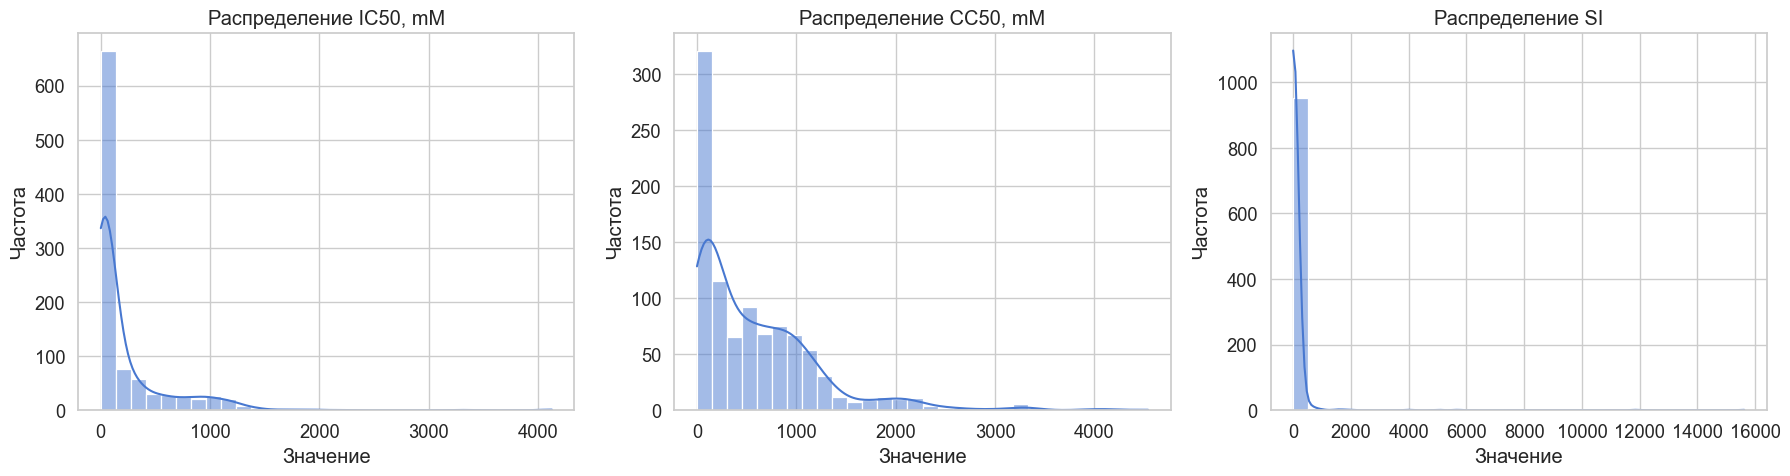

In [24]:
if not df.empty:
    target_vars = ['IC50, mM', 'CC50, mM', 'SI']
    
    plt.figure(figsize=(18, 5))
    for i, var in enumerate(target_vars):
        plt.subplot(1, 3, i + 1)
        sns.histplot(df[var], kde=True, bins=30)
        plt.title(f'Распределение {var}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

**Вывод:** Графики подтверждают, что распределения сильно смещены вправо. Применим логарифмическое преобразование (`log1p`, который обрабатывает нулевые значения) и создадим новые признаки.

Созданы новые логарифмированные целевые переменные.


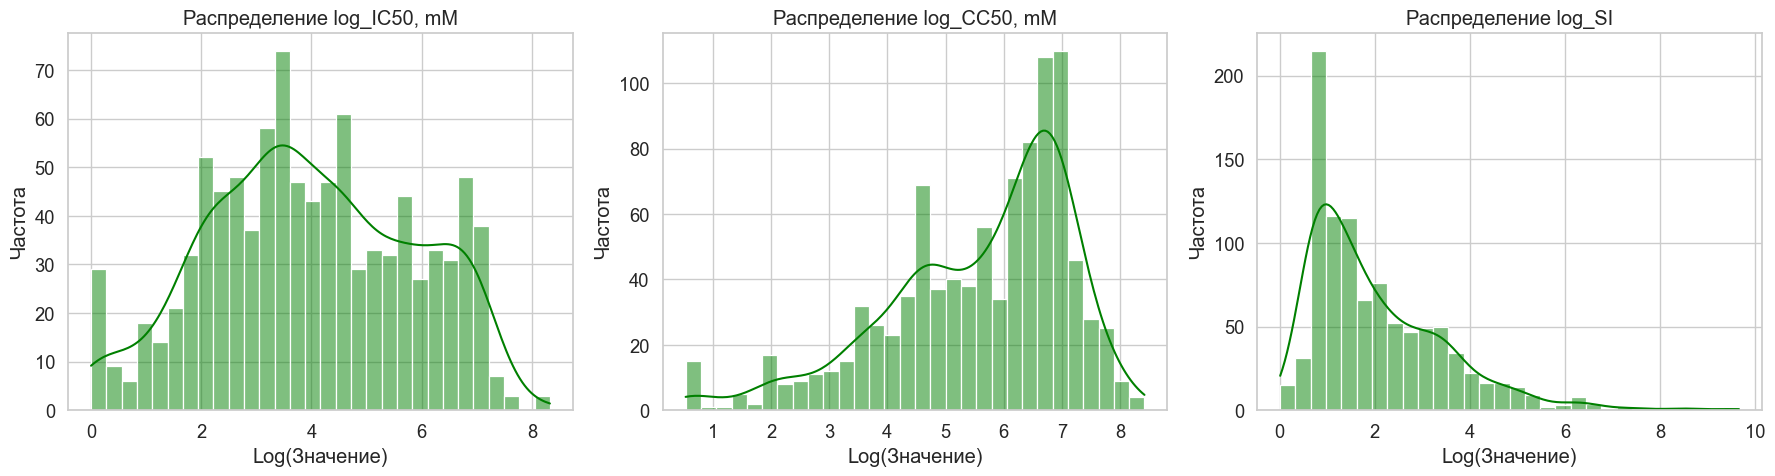

In [25]:
if not df.empty:
    for var in target_vars:
        df[f'log_{var}'] = np.log1p(df[var])
        
    print("Созданы новые логарифмированные целевые переменные.")

    plt.figure(figsize=(18, 5))
    for i, var in enumerate(target_vars):
        plt.subplot(1, 3, i + 1)
        sns.histplot(df[f'log_{var}'], kde=True, bins=30, color='green')
        plt.title(f'Распределение log_{var}')
        plt.xlabel('Log(Значение)')
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

### 5.3. Анализ выбросов
Выбросы могут значительно влиять на результаты статистического анализа и работу моделей. Идентифицируем их с помощью диаграмм размаха (boxplots) и удалим значения, выходящие за пределы 1.5 межквартильного размаха (IQR).

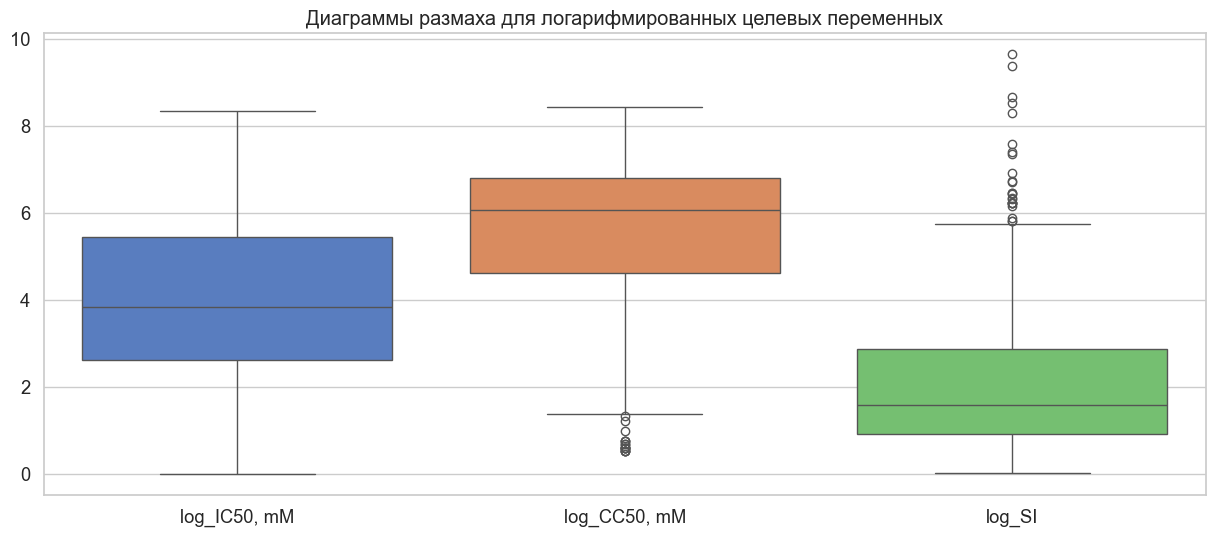

Размер данных до удаления выбросов: 969
Размер данных после удаления выбросов: 927


In [26]:
if not df.empty:
    log_target_vars = [f'log_{var}' for var in target_vars]
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df[log_target_vars])
    plt.title('Диаграммы размаха для логарифмированных целевых переменных')
    plt.show()
    
    # Удаление выбросов
    print(f"Размер данных до удаления выбросов: {df.shape[0]}")
    for col in log_target_vars:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Размер данных после удаления выбросов: {df.shape[0]}")

### 5.4. Корреляционный анализ
Построим тепловую карту корреляций, чтобы выявить сильные линейные зависимости между признаками. Это поможет в дальнейшем отборе признаков и позволит избежать мультиколлинеарности.

Для наглядности рассмотрим корреляцию между первыми 20 признаками и логарифмированными целевыми переменными.

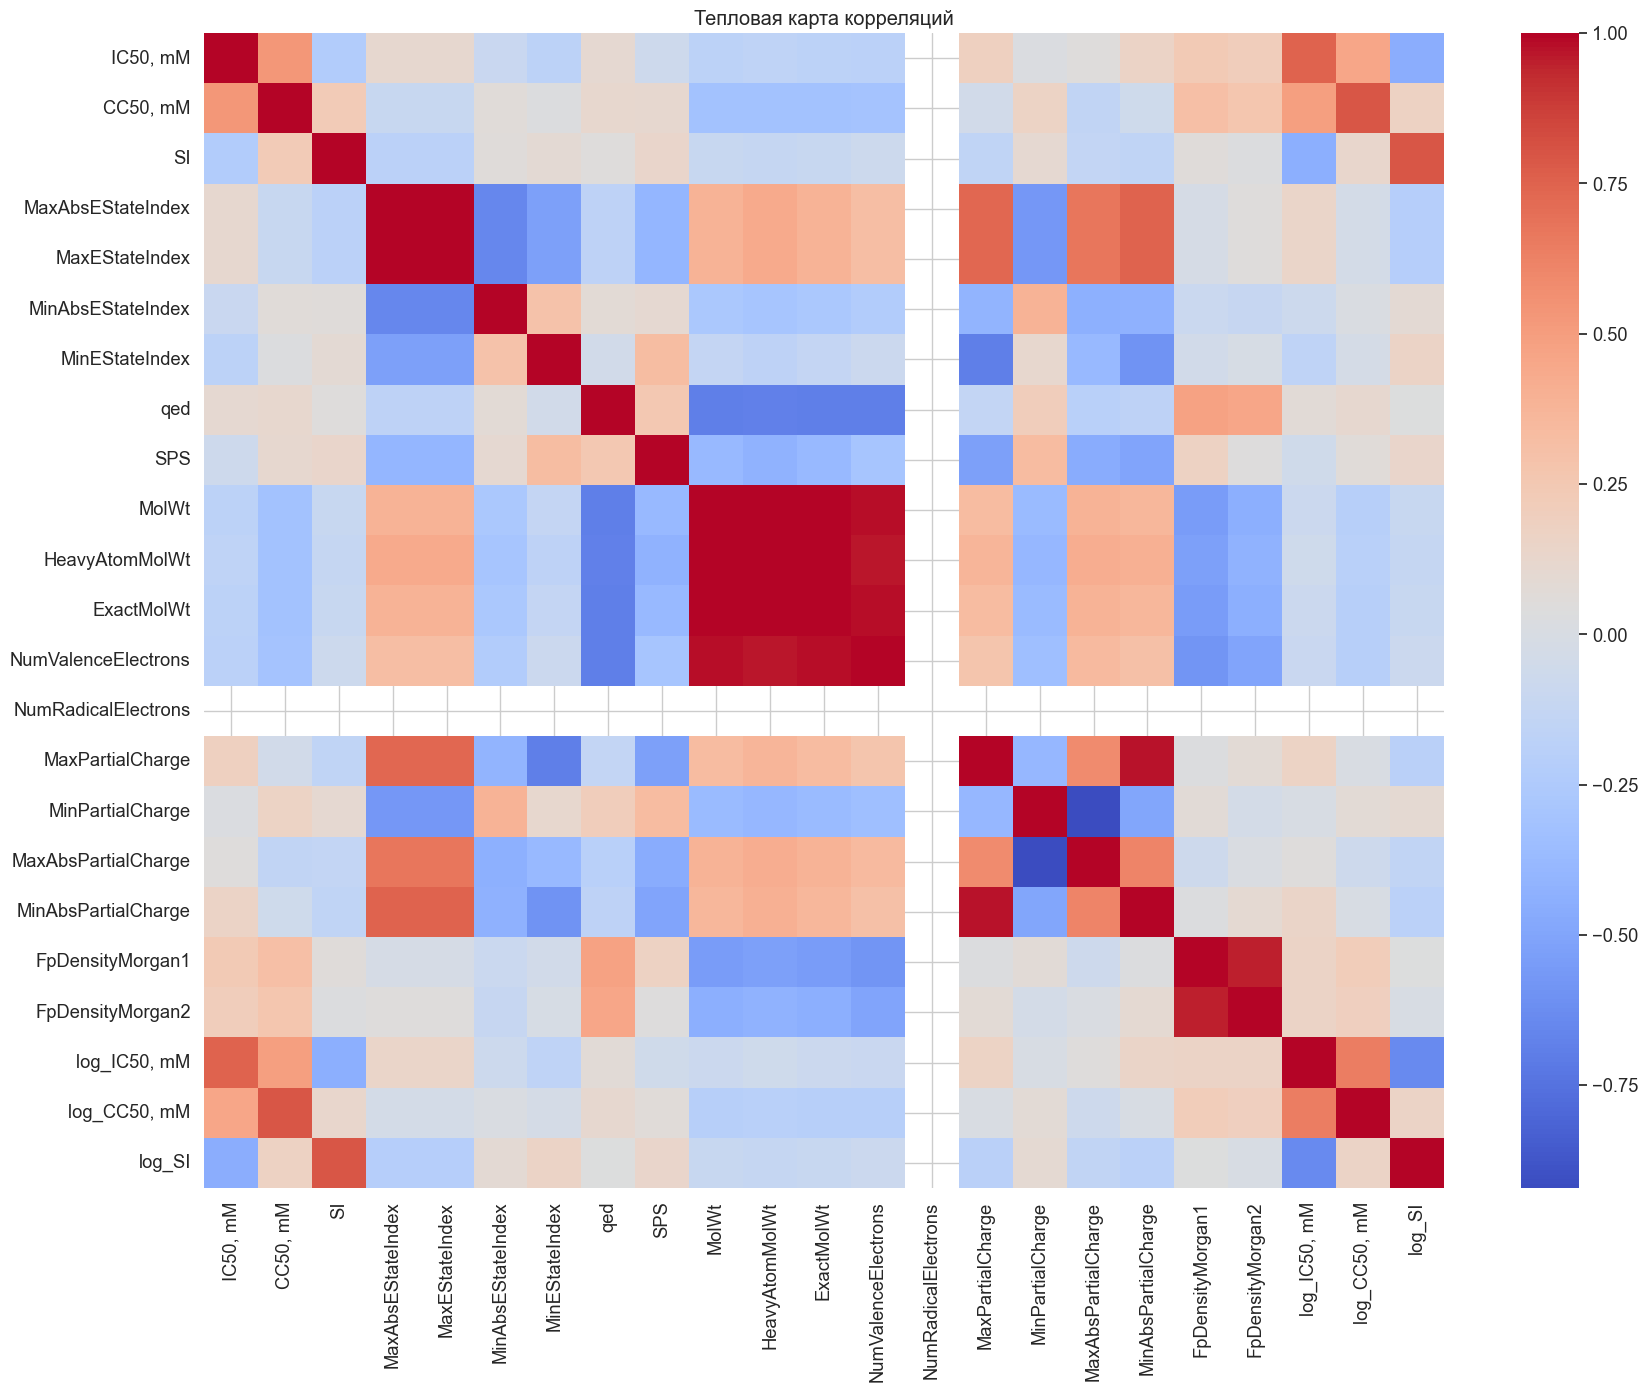

In [27]:
if not df.empty:
    # Выбираем подмножество признаков для анализа
    features_to_correlate = list(df.columns[:20]) + log_target_vars
    corr_matrix = df[features_to_correlate].corr()
    
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Тепловая карта корреляций')
    plt.show()

## 6. Подготовка данных для моделирования

### 6.1. Отбор признаков
Удалим исходные целевые переменные и оставим только их логарифмированные версии. Также удалим признаки с нулевой дисперсией (константные признаки), так как они не несут полезной информации.

In [28]:
if not df.empty:
    # Удаляем исходные целевые переменные
    df_model = df.drop(columns=target_vars)

    # Удаляем столбцы с нулевой дисперсией
    low_variance_cols = df_model.columns[df_model.var() == 0]
    df_model.drop(columns=low_variance_cols, inplace=True)
    print(f"Удалено {len(low_variance_cols)} константных признаков.")
    print(f"Итоговый размер данных для моделирования: {df_model.shape}")

Удалено 18 константных признаков.
Итоговый размер данных для моделирования: (927, 195)


### 6.2. Масштабирование признаков
Многие алгоритмы машинного обучения (например, PCA, SVM, линейные модели с регуляризацией) чувствительны к масштабу признаков. Применим стандартизацию (`StandardScaler`), чтобы привести все признаки к одному масштабу (среднее = 0, дисперсия = 1).

In [29]:
if not df_model.empty:
    # Отделяем признаки (X) от целевых переменных (y)
    X = df_model.drop(columns=log_target_vars)
    y = df_model[log_target_vars]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Преобразуем обратно в DataFrame для удобства
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    
    print("Признаки успешно отмасштабированы.")
    display(X_scaled.head())

Признаки успешно отмасштабированы.


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azo,fr_benzene,fr_bicyclic,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.743084,-1.743084,1.201963,0.856945,-0.733528,1.069440,0.239691,0.084162,0.240167,0.506672,-1.537883,1.500456,-1.700609,-1.596804,-2.035963,-2.417145,-2.736046,-0.581683,-0.272042,0.773747,0.013051,1.088643,0.435706,-0.339929,1.035586,0.715542,-1.517050,-0.375690,0.357701,0.913260,0.834596,0.266385,1.077811,0.954911,1.664030,1.492706,1.989248,1.821535,1.591048,1.406397,0.919178,-0.039996,0.526964,0.171655,-0.123535,0.461954,-1.070280,-0.654602,-0.571575,-0.615356,-0.459046,-0.454609,0.641434,-0.586785,-0.446905,-0.407703,1.317708,1.465361,1.691053,-1.174434,-1.160105,-0.310596,-0.104412,-0.794797,2.565091,2.155903,-0.052855,-1.230504,-0.537973,-0.959056,-0.650246,-0.462629,-0.524498,-0.368800,-1.067103,1.934404,2.429668,-0.871052,-0.217601,-0.575084,-0.797077,-0.659919,-0.954077,-0.153478,-1.071418,0.341482,0.307526,1.967786,-0.034723,-0.713943,1.065372,0.124794,-0.824257,-0.459561,-0.344547,-0.597213,0.969563,0.692011,-0.978993,1.868964,1.973704,-0.343671,1.267379,0.320098,-0.737467,-0.847262,1.919836,-0.874082,1.381502,-1.009756,-0.726519,-1.100912,-0.744015,-0.713152,-1.030077,0.958441,2.268465,-0.692736,1.855503,0.216663,1.691559,0.740202,-0.231104,-0.383773,-0.302428,-0.120351,-0.032862,-0.476574,-0.182879,-0.25308,-0.233682,-0.233682,-0.800159,-0.815186,-0.215117,-0.032862,4.082324,0.380653,-0.627357,-0.332017,-0.239431,-0.292559,-0.182879,-0.05698,-0.11452,-0.365422,-0.44779,-0.470832,-0.093301,-0.464354,-0.403157,-0.087228,-1.009756,1.713729,-0.06219,-0.455194,-0.72293,-0.215509,-0.05698,-0.513179,-0.05698,-0.265546,-0.24378,-0.169873,-0.387458,-0.279854,-0.200577,-0.385618,-0.232423,-0.080713,-0.173205,-0.11452,-0.109584,-0.065831,-0.089482,-0.382366,-0.249814,-0.249814,-0.24845,-0.081716,-0.148495,

## 7. Заключение и дальнейшие шаги

В ходе данного исследовательского анализа мы выполнили следующие ключевые шаги:
1.  **Очистили данные:** Удалили дубликаты и заполнили пропущенные значения с помощью медианной импутации.
2.  **Проанализировали распределения:** Обнаружили, что целевые переменные имеют сильно скошенное распределение, и успешно нормализовали их с помощью логарифмического преобразования.
3.  **Обработали выбросы:** Идентифицировали и удалили аномальные значения, используя метод IQR, что повысило качество данных.
4.  **Подготовили признаки:** Удалили константные признаки и выполнили стандартизацию, подготовив данные для построения моделей.

**Следующие шаги:**
* **Отбор признаков:** На основе корреляционного анализа и с использованием методов, таких как рекурсивное исключение признаков (RFE) или L1-регуляризация, можно отобрать наиболее значимые дескрипторы.
* **Построение моделей:** На подготовленных данных можно обучать различные модели машинного обучения (например, линейную регрессию, градиентный бустинг, случайный лес) для предсказания биологической активности.
* **Оценка моделей:** Провести кросс-валидацию и оценить качество моделей с помощью соответствующих метрик (например, R², MAE, RMSE).